# Datamining
## Assignment 3 - Exercise 2

<br></br>
<font size="4">


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import random as rnd
import math
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec

<font size="4">
    Παρακάτω χρησιμοποιούμε ένα modified αρχείο για τα data, το οποίο είναι ουσιαστικά το pruned_data.csv μαζί με μία στήλη για τις ημερομηνίες του κάθε review το οποίο δημιουργήθηκε διατρέχοντας το αρχικό dataset με τα reviews στο Toronto και παίρνοντας από εκεί τις ημερομηνίες του κάθε review.

In [2]:
#Read the csv file and make it into dataframe
df = pd.read_csv('modified_pruned_data.csv', names=['u_id','b_id','rating','date_time'],index_col=False)
df['date_time'] = pd.to_datetime(df['date_time']) #convert date_time column to datetime variables
uid = df['u_id'].to_numpy()
bid = df['b_id'].to_numpy()

#Keep only the unique id values
user = np.unique(uid)
business = np.unique(bid)

#Create a dictionary where the key is (u_id,b_id) as a string and the value is the rating
a = df.to_numpy()
d = {}
for l in a:
    d[l[0]+" " +l[1]] = l[2]

#Delete randomly 5% of the reviews and keep them in the dictionary del_d
del_d = {}
num = round(len(d) * (5/100))
for key in rnd.sample(d.keys(), num):
    del_d[key] = d[key]
    del d[key] 

#Create a dictionary to hold the positions of the values
pos_d = {}
#Create the sparse array for the ratings
arr = []
counteri = 0
for i in user:
    temp = []
    counterj = 0
    for j in business:
        st = i + " " + j
        if st in d:
            temp.append(d[st])
            pos_d[st] = [counteri, counterj]
        elif st in del_d:
            pos_d[st] = [counteri, counterj]
            temp.append(0)
        else:
            pos_d[st] = [counteri, counterj]
            temp.append(0)
        counterj += 1
    arr.append(temp)
    counteri += 1

In [3]:
sparse_arr = np.array(arr)
comp_sparse_arr = sp.sparse.csc_matrix(sparse_arr)
sparse_arr.shape

(4794, 4092)

<font size="4">
Δημιουργούμε ένα λεξικό που για κάθε ζεύγος user id, business id δίνει την ημερομηνία που έγινε το review

In [4]:
date_d = {} # (u_id,b_id):date
for i in df.to_numpy():
    st = i[0] + " " + i[1]
    if st not in date_d:
        date_d[st] = l[3]
date_d

{'TZQSUDDcA4ek5gBd6BzcjA qUWqjjjfpB2-4P3He5rsKw': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA 6n_MDeYxU1ihB38be9TkVA': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA jo4KmAqlZ7vxjHIP7IIkAw': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA dsAcgF6qtZy2m6d_yWCrGQ': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA siaRCT2-PkyeXUVKrywcTg': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA SGP1jf6k7spXkgwBlhiUVw': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA orrhJxM6V1USwccG7MlxmA': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA fJ-2acaqvWOsujUTAJB-ew': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA 272a60ze8sADYRR6GyJ3GA': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA 47wBHgBwQ8_70sjmXow_1g': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA Nq0UHjD_cKW9UbIJplQf_g': Timestamp('2017-12-05 03:19:44'),
 'TZQSUDDcA4ek5gBd6BzcjA 6eRSdODyj9GS0w6zlhrWkg': Timestamp('2017-12-05 03:1

<font size="4">
Δημιουργούμε την λίστα με μία "πρόταση" για κάθε χρήστη

In [5]:
user_emb_d = {} #user_id:text_from_businessids
for u in user:
    arrB = []
    for b in business:
        posU = pos_d[u + " " + b][0]
        posB = pos_d[u + " " + b][1]
        if sparse_arr[posU][posB] > 0:
            arrB.append(b)
    #Sorting b_ids based on dates
    arrB.sort(key = lambda x : date_d[u+" "+x])
    st_emb = " ".join(arrB)
    user_emb_d[u] = st_emb

In [6]:
business_words = list(user_emb_d.values())

In [7]:
business_words_vec = [sentence.split() for sentence in business_words]
len(business_words_vec)

4794

<font size="4">
Εκπαιδεύουμε ένα μοντέλο με βάση τον παραπάνω πίνακα. (το παρακάτω δίνεται ως παράδειγμα)

In [8]:
model = Word2Vec(business_words_vec,sg=1,size=100, window=5) # d=100 and window=5

In [9]:
model[business[0]]

<ipython-input-9-1850c5916aff>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model[business[0]]


array([ 0.16884089, -0.1457714 , -0.05570303,  0.02998156,  0.04705839,
        0.16062926, -0.04516782,  0.44147068,  0.3047853 , -0.05004926,
       -0.35988835,  0.34063116, -0.26805457, -0.15286958,  0.4117849 ,
       -0.32622442,  0.42041364,  0.20177542,  0.15067215, -0.13676724,
       -0.29887816, -0.01363225,  0.06483924,  0.01362483,  0.26037574,
       -0.48139957,  0.21274161,  0.15616296,  0.05162159,  0.13815343,
        0.02147548, -0.07093853,  0.2330396 ,  0.10745663, -0.09475084,
        0.02174225,  0.12930138,  0.1379577 ,  0.32478467, -0.12882715,
        0.00516676, -0.00588148,  0.07200508,  0.27541   , -0.1783298 ,
        0.19821087, -0.03651083,  0.15221058, -0.22372758, -0.31162232,
        0.08466376, -0.21714634, -0.06884664, -0.2163669 , -0.11479745,
        0.25971025, -0.20664695,  0.13908628,  0.15269634,  0.06450789,
       -0.14863831, -0.4166173 ,  0.07074614,  0.27957782, -0.10009372,
       -0.05344716,  0.0553766 ,  0.28793806, -0.25034294,  0.24

### ICF implementation using embeddings

In [10]:
t_sparse_arr = np.transpose(sparse_arr) # array is transposed because we are implementing ICF
t_comp_sparse_arr = sp.sparse.csc_matrix(t_sparse_arr)
print(t_comp_sparse_arr.shape)
print(t_sparse_arr.shape)

(4092, 4794)
(4092, 4794)


In [11]:
def ICF(k,w):
    f_model = Word2Vec(business_words_vec,sg=1,size=100, window=w) #Model creation based on window, size is always equal to 100
    #k is the number of similar users that we keep
    predICF_d = {} #Dictionary that stores predicted ratings
    for r in del_d:
        userid = r.split()[0]
        bizid = r.split()[1]
        upos = pos_d[r][0]
        bpos = pos_d[r][1]
        sb_pos = t_comp_sparse_arr[:,upos].indices #Take all businesses that have been rated by a certain user
        sim_scores = []
        for i in sb_pos:
            cos_sim = 1 - sp.spatial.distance.cosine(f_model[business[i]],f_model[business[bpos]]) #Here we use embeddings for similarity
            sim_scores.append([i,cos_sim])
        sim_scores.sort(reverse=True,key=lambda x: x[1])
        sim_scores = sim_scores[:k] #Take k most common users
        ratings = np.array([[d[userid+" "+business[x[0]]] for x in sim_scores]])
        similarities = np.array([[x[1] for x in sim_scores]])
        similarities = np.transpose(similarities)
        prediction = float(np.matmul(ratings,similarities) / np.sum(similarities))
        predICF_d[userid+" "+bizid] = prediction
    return predICF_d

<font size =4>
Example

In [12]:
ICF(5,10) # (UserID, BusinessID) : predicted_rating

<ipython-input-11-10b145f24108>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  cos_sim = 1 - sp.spatial.distance.cosine(f_model[business[i]],f_model[business[bpos]]) #Here we use embeddings for similarity


{'Gb-j1JnTcC2FhwgTE_iZAA q3ilBINLR7KoBBlxSqCvlA': 3.6025412358326965,
 'KpzKPS-UDVrEp6PWRLUSSQ 4h0JeXtiLaqqpB-9-V7few': 3.44853667702813,
 'NczSmRSRdTsI8fQyojdZrw eUjDWzbQ6eLZy0uELEOa9Q': 4.279428408461762,
 'yTfx2lg7SFYTi5KnOdj7Vw AcCZJpxiPqyzKFjlwlwd0Q': 4.819293372530538,
 'eF0N0s6CeiZYPt0frlX48A VRwT0pscR5vESCrAnUpNwQ': 4.167375862711607,
 'VWJ8PSz6Sg5_AlBvQyGvpw fKiNJYDyo4Rpw7NRCBp-Uw': 3.581233787352117,
 'oTlIAnZDA9_8XNTsafGPFQ G6EkDTXZ6zMUovg7JTG4YQ': 4.197878557135913,
 'Hgk28bzA5BoKYP17CYXABQ TU95jEn8aGitY8hZowXaBg': 4.389848749963952,
 'Inm5AJK0HS5lJHyhMDnl4Q DE89UdHFMCN6DtYWZuer5A': 3.234817423865129,
 'Gf8Jew6GZHKCk2F6kPZh5Q nRZjrWIzqKc26KjpBG0fHg': 3.192985929696087,
 'M2fjARghKjaHWh7psiDXPg D-8yidw7FLKKQpciKJSd2g': 3.8248356766360017,
 'uO1w3qNo21c1bVHHFTYW0w 9ET_RUNztevq4_OLAX80Gg': 3.806136389358368,
 'aIsP_d0r5TP07BKkxbf3-w AFIPIemA3dHRFxH_RgIIBA': 3.5909040321976367,
 'yRB4UrgnLs3BxbVM1QQ0Gw NoT7u2QNEvsVbH9MIzAzlw': 4.58697211517289,
 'YRpt761-BvFVNI-PiJpu9g BUcTdN-r

### UCF implementation using embeddings

<font size="4">
Δημιουργούμε μια λίστα με μία "πρόταση" για κάθε επιχείρηση

In [13]:
biz_emb_d = {} #business_id:text_from_userids
for b in business:
    arrU = []
    for u in user:
        posU = pos_d[u + " " + b][0]
        posB = pos_d[u + " " + b][1]
        if t_sparse_arr[posB][posU] > 0:
            arrU.append(u)
    #Sorting b_ids based on dates
    arrU.sort(key = lambda x : date_d[x+" "+b])
    st_emb = " ".join(arrU)
    biz_emb_d[b] = st_emb

In [14]:
user_words = list(biz_emb_d.values())

In [15]:
user_words_vec = [sentence.split() for sentence in user_words]
len(user_words_vec)

4092

<font size="4">
Εκπαιδεύουμε ένα μοντέλο με βάση τον παραπάνω πίνακα. (το παρακάτω δίνεται ως παράδειγμα)

In [16]:
model2 = Word2Vec(user_words_vec,sg=1,size=100, window=5) # d=100 and window=5

In [17]:
model2[user[0]]

<ipython-input-17-e030154aa980>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model2[user[0]]


array([-0.0796227 ,  0.14200763, -0.15948199,  0.21309333, -0.1837862 ,
       -0.17451175, -0.23411041,  0.07386234,  0.11130267, -0.2606307 ,
        0.24601027,  0.14207487,  0.5016221 ,  0.34192795,  0.17908874,
        0.26361477,  0.04949328, -0.02134688, -0.00397053, -0.71755934,
        0.45122343,  0.22015864,  0.12408992, -0.29897875,  0.03338862,
        0.10975425,  0.24401549,  0.06945513, -0.2384934 ,  0.10072105,
       -0.15536804,  0.09043499, -0.19795892, -0.04117677, -0.10465813,
        0.05969845, -0.22057413,  0.15965521, -0.18807726,  0.15247275,
        0.07993144, -0.35368535, -0.27466637,  0.3402495 , -0.51758647,
       -0.8774343 ,  0.3450848 ,  0.1891505 , -0.12847595,  0.33725187,
        0.17191096, -0.2597192 ,  0.25312924,  0.05013072, -0.41441914,
       -0.01025616,  0.10138394, -0.00588974, -0.28114945,  0.34761283,
        0.03664267, -0.11358783,  0.3498126 ,  0.2932066 ,  0.06328042,
       -0.09432422,  0.03159466,  0.08557703,  0.06983982,  0.27

<font size=4>
    Ο αλγόριθμος UCF

In [18]:
def UCF(k,w):
    f_model = Word2Vec(user_words_vec,sg=1,size=100, window=w) #Model creation based on window, size is always equal to 100
    #k is the number of similar users that we keep
    predUCF_d = {} #Dictionary that stores predicted ratings
    for r in del_d:
        userid = r.split()[0]
        bizid = r.split()[1]
        upos = pos_d[r][0]
        bpos = pos_d[r][1]
        su_pos = comp_sparse_arr[:,bpos].indices #Take all users that have rated a certain business
        sim_scores = []
        for i in su_pos:
            cos_sim = 1 - sp.spatial.distance.cosine(f_model[user[i]],f_model[user[upos]]) #Here we use embeddings for similarity
            sim_scores.append([i,cos_sim])
        sim_scores.sort(reverse=True,key=lambda x: x[1])
        sim_scores = sim_scores[:k] #Take k most common users
        ratings = np.array([[d[user[x[0]]+" "+bizid] for x in sim_scores]])
        similarities = np.array([[x[1] for x in sim_scores]])
        similarities = np.transpose(similarities)
        prediction = float(np.matmul(ratings,similarities) / np.sum(similarities))
        predUCF_d[userid+" "+bizid] = prediction
    return predUCF_d

<font size =4>
Example

In [19]:
UCF(5,10) # (UserID, BusinessID) : predicted_rating

<ipython-input-18-c06a6a56627f>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  cos_sim = 1 - sp.spatial.distance.cosine(f_model[user[i]],f_model[user[upos]]) #Here we use embeddings for similarity


{'Gb-j1JnTcC2FhwgTE_iZAA q3ilBINLR7KoBBlxSqCvlA': 3.6066346239775324,
 'KpzKPS-UDVrEp6PWRLUSSQ 4h0JeXtiLaqqpB-9-V7few': 2.160530170704105,
 'NczSmRSRdTsI8fQyojdZrw eUjDWzbQ6eLZy0uELEOa9Q': 3.797361709844613,
 'yTfx2lg7SFYTi5KnOdj7Vw AcCZJpxiPqyzKFjlwlwd0Q': 4.410966483056246,
 'eF0N0s6CeiZYPt0frlX48A VRwT0pscR5vESCrAnUpNwQ': 4.40415627574219,
 'VWJ8PSz6Sg5_AlBvQyGvpw fKiNJYDyo4Rpw7NRCBp-Uw': 3.396462969444919,
 'oTlIAnZDA9_8XNTsafGPFQ G6EkDTXZ6zMUovg7JTG4YQ': 3.1903043224707854,
 'Hgk28bzA5BoKYP17CYXABQ TU95jEn8aGitY8hZowXaBg': 3.4365013223676346,
 'Inm5AJK0HS5lJHyhMDnl4Q DE89UdHFMCN6DtYWZuer5A': 4.601224899305376,
 'Gf8Jew6GZHKCk2F6kPZh5Q nRZjrWIzqKc26KjpBG0fHg': 3.216793493158934,
 'M2fjARghKjaHWh7psiDXPg D-8yidw7FLKKQpciKJSd2g': 2.5719929837783466,
 'uO1w3qNo21c1bVHHFTYW0w 9ET_RUNztevq4_OLAX80Gg': 4.192690757900432,
 'aIsP_d0r5TP07BKkxbf3-w AFIPIemA3dHRFxH_RgIIBA': 4.060424968572473,
 'yRB4UrgnLs3BxbVM1QQ0Gw NoT7u2QNEvsVbH9MIzAzlw': 4.203265997650598,
 'YRpt761-BvFVNI-PiJpu9g BUcTdN

### Evaluation of new algorithms

### UCF using embeddings vs old UCF

In [23]:
actual_ratings = list(del_d.values()) #List of all the deleted ratings
k_valuesUCF = [1,5,10,20,50,100,200,500,1000]
window_values = [10,50,100,1000]
rmseUCF_values = []
def rmseUCF():
    for w in window_values:
        temp_vals = []
        for i in k_valuesUCF:
            predictions = list(UCF(i,w).values())
            n = len(predictions)
            s = 0
            for i in range(len(predictions)):
                t = math.pow((actual_ratings[i] - predictions[i]),2)
                if math.isnan(t) == False:
                    s += t
            out = math.sqrt(s/n)
            temp_vals.append(out)
        rmseUCF_values.append(temp_vals)
    return

In [24]:
rmseUCF()

<ipython-input-18-c06a6a56627f>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  cos_sim = 1 - sp.spatial.distance.cosine(f_model[user[i]],f_model[user[upos]]) #Here we use embeddings for similarity


In [25]:
rmseUCF_values

[[1.4069487802083878,
  1.0779273054699223,
  1.0326653612628696,
  1.0130666678965634,
  1.0042871918636072,
  1.0025164511962554,
  1.001750280734506,
  1.001689490343444,
  1.0017062936471748],
 [1.3856948301619887,
  1.0717421461338068,
  1.0323816484207462,
  1.0101346069706125,
  1.0006158084504757,
  0.9991601600608006,
  0.9986632483597628,
  0.9985517662706183,
  0.9985425434512873],
 [1.3780588761855446,
  1.0705918090979885,
  1.0285788443639494,
  1.0087463772426577,
  0.99933116164689,
  0.9984402374892655,
  0.9979070801188682,
  0.9979250865024544,
  0.9979243484047933],
 [1.3645187891612287,
  1.0649160813381924,
  1.024901729379447,
  1.0064159617873973,
  0.9980330715493031,
  0.9974386409972796,
  0.9971803635478014,
  0.9974582330177265,
  0.9973525441034411]]

Text(0.5, 1.0, 'UCF')

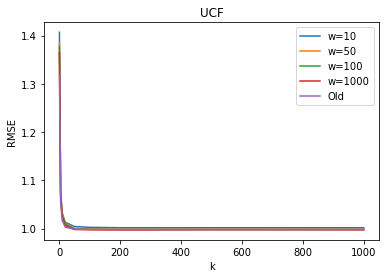

In [43]:
### w = 10
plotUCF_d = {'k':k_valuesUCF, 'RMSE':rmseUCF_values[0]}
dataUCF = pd.DataFrame(plotUCF_d)
### w = 50
plotUCF_d1 = {'k':k_valuesUCF, 'RMSE':rmseUCF_values[1]}
dataUCF1 = pd.DataFrame(plotUCF_d1)
### w = 100
plotUCF_d2 = {'k':k_valuesUCF, 'RMSE':rmseUCF_values[2]}
dataUCF2 = pd.DataFrame(plotUCF_d2)
### w = 1000
plotUCF_d3 = {'k':k_valuesUCF, 'RMSE':rmseUCF_values[3]}
dataUCF3 = pd.DataFrame(plotUCF_d3)
### old UCF
rmseOldUCF_values = [1.319189,1.054339,1.017011,1.003003,0.998713,0.998408,0.998339,0.998360,0.998357] #We use old data to avoid reruns
plotUCF_dold = {'k':k_valuesUCF, 'RMSE':rmseOldUCF_values}
dataUCFold = pd.DataFrame(plotUCF_dold)
###
sns.lineplot(data=dataUCF,x='k',y='RMSE',label='w=10')
sns.lineplot(data=dataUCF1,x='k',y='RMSE',label='w=50')
sns.lineplot(data=dataUCF2,x='k',y='RMSE',label='w=100')
sns.lineplot(data=dataUCF3,x='k',y='RMSE',label='w=1000')
sns.lineplot(data=dataUCFold,x='k',y='RMSE',label='Old')
plt.title('UCF')

<font size=4>
    Δεν παρατηρούνται ιδιαίτερες βελτιώσεις μεταξύ των αλγορίθμων. Όταν έχουμε w=1000 και k=200 επιτυγχάνεται το μικρότερο error από όλα. Για w>100 ο αλγόριθμος αρχίζει να παρουσιάζει μικρή βελτίωση στα μεγάλα k σε σχέση με τον παλιό αλγόριθμο η οποία όμως είναι της τάξης τρίτου δεκαδικού ψηφίου.

### ICF using embeddings vs old ICF

In [28]:
k_valuesICF = [1,5,10,20,40,50,60,70,80,100]
rmseICF_values = []
def rmseICF():
    for w in window_values:
        temp_vals = []
        for i in k_valuesICF:
            predictions = list(ICF(i,w).values())
            n = len(predictions)
            s = 0
            for i in range(len(predictions)):
                t = math.pow((actual_ratings[i] - predictions[i]),2)
                if math.isnan(t) == False:
                    s += t
            out = math.sqrt(s/n)
            temp_vals.append(out)
        rmseICF_values.append(temp_vals)
    return

In [30]:
rmseICF()

<ipython-input-11-10b145f24108>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  cos_sim = 1 - sp.spatial.distance.cosine(f_model[business[i]],f_model[business[bpos]]) #Here we use embeddings for similarity


In [31]:
rmseICF_values

[[1.4449798340389464,
  1.113288953335946,
  1.0652964329960313,
  1.0460947999613006,
  1.0379723494187716,
  1.0368373996210611,
  1.036751508220809,
  1.0363078701752695,
  1.0358428532825386,
  1.035940617467473],
 [1.4024705705642102,
  1.0897848634046816,
  1.0463353205572565,
  1.0300323711406367,
  1.026681762612986,
  1.0260630448776953,
  1.0262339710478856,
  1.0263858177078367,
  1.026661751596044,
  1.0271741667325547],
 [1.4102621336880197,
  1.0801142571427782,
  1.041926899339753,
  1.02612987094324,
  1.0241853869195496,
  1.0240854182683652,
  1.0242462270906645,
  1.0245935788171645,
  1.024798926035065,
  1.0252648237709183],
 [1.3978691460042494,
  1.0823373614904213,
  1.0390602732873417,
  1.0250358220361013,
  1.0223546396544723,
  1.0224846219493384,
  1.022483914667493,
  1.0228859656041849,
  1.023382390536635,
  1.0237758467041798]]

Text(0.5, 1.0, 'ICF')

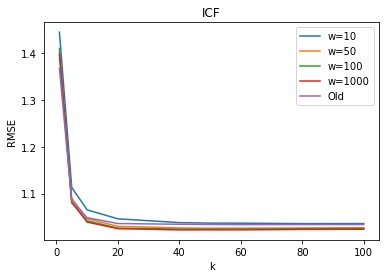

In [38]:
### w = 10
plotICF_d = {'k':k_valuesICF, 'RMSE':rmseICF_values[0]}
dataICF = pd.DataFrame(plotICF_d)
### w = 50
plotICF_d1 = {'k':k_valuesICF, 'RMSE':rmseICF_values[1]}
dataICF1 = pd.DataFrame(plotICF_d1)
### w = 100
plotICF_d2 = {'k':k_valuesICF, 'RMSE':rmseICF_values[2]}
dataICF2 = pd.DataFrame(plotICF_d2)
### w = 1000
plotICF_d3 = {'k':k_valuesICF, 'RMSE':rmseICF_values[3]}
dataICF3 = pd.DataFrame(plotICF_d3)
### old ICF
rmseOldICF_values = [1.368046,1.084656,1.048528,1.036041,1.034430,1.033942,1.033601,1.033750,1.033778,1.033846] #We use old data to avoid reruns
plotICF_dold = {'k':k_valuesICF, 'RMSE':rmseOldICF_values}
dataICFold = pd.DataFrame(plotICF_dold)
###
sns.lineplot(data=dataICF,x='k',y='RMSE',label='w=10')
sns.lineplot(data=dataICF1,x='k',y='RMSE',label='w=50')
sns.lineplot(data=dataICF2,x='k',y='RMSE',label='w=100')
sns.lineplot(data=dataICF3,x='k',y='RMSE',label='w=1000')
sns.lineplot(data=dataICFold,x='k',y='RMSE',label='Old')
plt.title('ICF')

<font size =4>
    Για w=10 το rmse είναι χείροτερο σχεδόν για όλα τα k σε σχέση και με τον παλιό αλγόριθμο (χωρίς embeddings) αλλά και σε σχέση με τους υπόλοιπους που χρησιμοποιούν μεγαλύτερο window size. Για w>10 βλέπουμε πως αρχίζει να υπάρχει βελτίωση συγκριτικά με τον παλιό αλγόριθμο, η οποία είναι της τάξης του δεύτερου δεκαδικού ψηφίου.